#  Cours 2 : Gradient Decresent - Régression linéaire et polynomiale
### Author:  Ricardo Vallejo

# Excercise 1:  Regression lineaire

### 1.1. Générez un vecteur x de données aléatoires de dim 100.
### 1.2. Soit y la variable à prédire tels que y = 4 + 3x + (étant un bruit gaussien).
### 1.3. Représentez le diagramme de dispersion de y en fonction de x.


Text(0.5, 0, 'X')

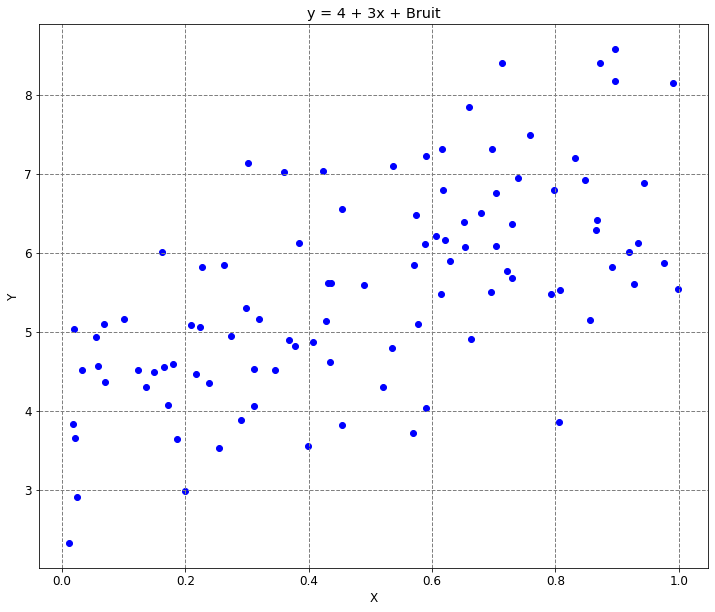

In [5]:
import numpy as np #Librería numérica
import matplotlib.pyplot as plt # Para crear gráficos con matplotlib
#%matplotlib inline # Si quieres hacer estos gráficos dentro de un jupyter notebook

# generate random floating point values
from numpy.random import seed
from numpy.random import rand


def f(x):  # función f(x) = 3*x + 4 + Ruido_Gaussiano
    np.random.seed(0)
    y = 4 + 3*x + np.random.randn(x.shape[0],1)
    return y

x = np.random.rand(100, 1)
y = f(x)

# hacemos un gráfico de los datos que hemos generado
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(12, 10))
plt.title("y = 4 + 3x + Bruit")
plt.scatter(x,y,label='data', color='blue')
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.ylabel("Y")
plt.xlabel("X")


### 1.4. Modèle de régression linéaire -  l’équation normale. 


- When to use Normal Equation?
    - If the algorithm you want to use is Linear Regression and exactly Linear Regression and,
    - If n (number of features) is small.
    - If m (number of training examples) is small i.e. around 20,000.

In [6]:
def find_theta(X, Y):
    
    m = X.shape[0] # Number of training examples. 
    # Appending a cloumn of ones in X to add the bias term.
    X = np.append(X, np.ones((m,1)), axis=1)    
    # reshaping y to (m,1)
    Y = Y.reshape(m,1)
    
    # The Normal Equation
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
    
    return theta

In [12]:
# Getting the Value of theta using the find_theta function.
theta = find_theta(x, y)
theta

array([[2.92335279],
       [4.09772262]])

y= 4.22 + 2.96 x

In [14]:
theta[0]

array([2.92335279])

## Solucion Neila

In [20]:
X_b = np.c_[np.ones((100, 1)), x]
theta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_hat

array([[4.09772262],
       [2.92335279]])

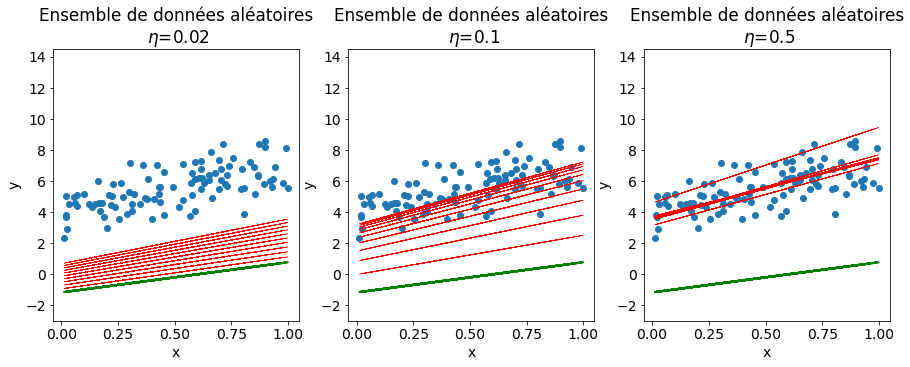

In [17]:
# Fonction utilisé pour la représentation de la droite de régression

def DrawTheta(X,Y,eta,Theta,X_b,m,Color,LineWidth):
    # Plot init 'Theta'
    gradients = 2/m * X_b.T.dot(X_b.dot(Theta) - Y)
    Theta = Theta - eta * gradients
    y_pred = Theta[0] + Theta[1] * X
    plt.plot(X,y_pred, Color, linewidth=LineWidth)
    return Theta

# On doit ajouter x0 = 1 à chaque observation
# Fixer la valeur de l'hyperparamètre qui correspond au nombre d'itération.
# Le pas d'apprentissage étant un hyperpamètre mais qui sera variable
# thetaInit est une initialisation aléatoire des valeurs de theta
# La représentation graphique est réalisée pour les 10 première itérations
m=100
n_iterations = 1000
X_b = np.c_[np.ones((100, 1)), x]
List_eta=[0.02, 0.1, 0.5]
thetaInit = np.random.randn(2,1)
fig = plt.figure(figsize=(15, 5))

for i, eta in zip(np.arange(len(List_eta))+1, List_eta):
    theta = thetaInit
    plt.subplot(1, 3, i)
    plt.rcParams.update({'font.size': 14})
    plt.scatter(x,y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Ensemble de données aléatoires\n " + r'$\eta$='+str(eta))

    # Plot init 'Theta'
    y_pred = thetaInit[0] + thetaInit[1] * x
    plt.plot(x,y_pred, 'g--', linewidth=2)
    
    for iteration in range(n_iterations):
        if (iteration < 10):
            theta=DrawTheta(x,y,eta,theta,X_b,m,'r',0.5)
            plt.ylim(-3, 14.5)
            plt.plot()

### Rta:  y = 2.8 x + 4.24

In [21]:
Ypreds = theta_hat[0] + theta_hat[1] * x


In [23]:
theta_hat[0]

array([4.09772262])

In [25]:
theta_hat

array([[4.09772262],
       [2.92335279]])

In [24]:
theta_hat[1]

array([2.92335279])

Text(0, 0.5, 'y - targete')

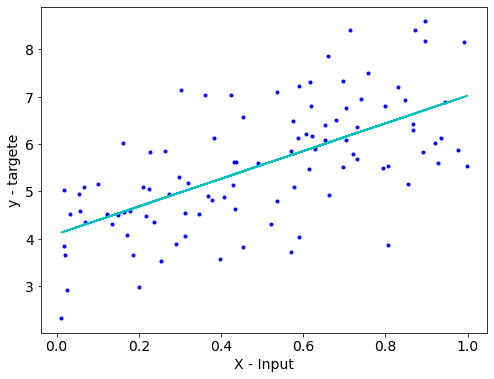

In [22]:
# Plotting the predictions.
fig = plt.figure(figsize=(8,6))
plt.plot(x, y, 'b.')
plt.plot(x, Ypreds, 'c-')
plt.xlabel('X - Input')
plt.ylabel('y - targete')

### 1.5. Modèle de régression - LinearRegression
         Écrivez l’équation de régression obtenue

In [26]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

X2 = x.reshape((-1,1))
Y2 = y

mymodel2 = LinearRegression()
results2 = mymodel2.fit(X2,Y2)

print("Coeficient determination: \n", results2.score(X2, Y2))
print("Intercept: \n", results2.intercept_)
print("Slope: \n", results2.coef_)


Coeficient determination: 
 0.40373202023527743
Intercept: 
 [4.09772262]
Slope: 
 [[2.92335279]]


### Rta:  y = 2.8x + 4.24

### 1.6 :Linear Regression - Gradient Descendent

https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

In [27]:
# Modèle linéaire ajusté en se basant sur un descente
# de gradient stockastique
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.12114876]), array([2.89198833]))

# Excercice2 : Regression polynomiale

In [28]:
import numpy as np
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [29]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


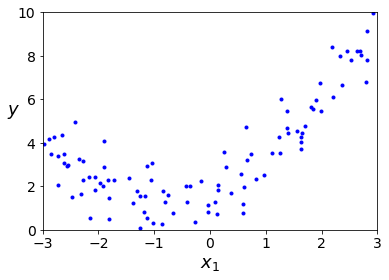

In [30]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()


In [31]:
# Génère une nouvelle matrice de caractéristiques composée
# de toutes les combinaisons polynomiales des caractéristiques
# avec un degré inférieur ou égal au degré spécifié.
# Dans notre cas degree=2
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [32]:
# Vérification avec une valeur scalaire de X
X[0]

array([-0.75275929])

In [33]:
# Vérification avec une valeur scalaire de X
X[0]

array([-0.75275929])

In [34]:
# On consiste à ajouter les puissances de chacune des
# variables comme nouvelles variables, puis d’entraîner
# un modèle linéaire sur ce nouvel ensemble de données
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_


(array([1.78134581]), array([[0.93366893, 0.56456263]]))

### On obtient les valeurs de , et . L'équation de régression polynomiale est alors y_pred = theta_hat[0] + theta_hat[1] X + theta_hat[2] X^2


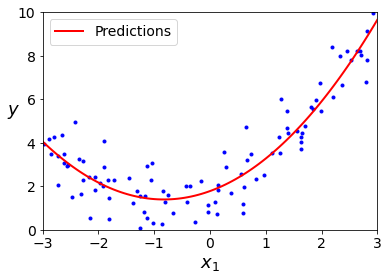

In [35]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

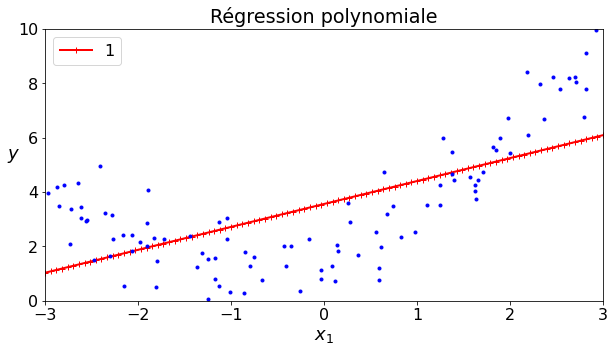

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
dict=["a","b"]
plt.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(10, 5))
for style, width, degree in (("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
    ("poly_features", polybig_features),
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg),
    ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)

plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("Régression polynomiale")
plt.axis([-3, 3, 0, 10])
plt.show()

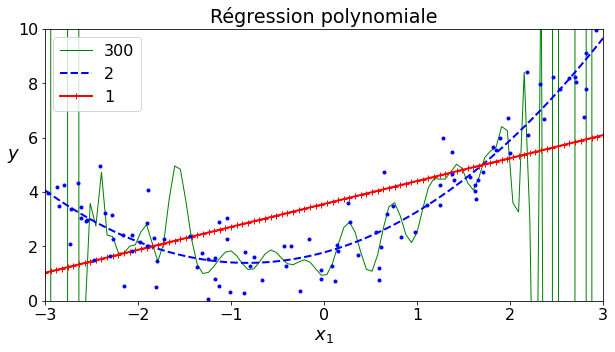

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
dict=["a","b"]
plt.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(10, 5))
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
    ("poly_features", polybig_features),
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg),
    ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)
    
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("Régression polynomiale")
plt.axis([-3, 3, 0, 10])
plt.show()